## I. Background
International trade has many advantages that countries and stakeholders can benefit from. Such as Increased revenues, Decreased competition, Longer product lifespan, Easier cash-flow management, Better risk management, Benefiting from currency exchange, Access to export financing, and Disposal of surplus goods. However, on the other hand, there are some problems and disadvantages of international trade. The most common problems that countries and stakeholders face in international trades are as follow: shipping customs and duties, language barriers, cultural differences, servicing customers, returning products, and intellectual property theft.

In [ ]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from catboost import CatBoostClassifier
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install plotly

In [ ]:
!pip install ipywidgets

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import missingno as msno

In [ ]:
!pip install catboost

## II. Data Source and Data Preprocessing
The data was obtained from:https://www.kaggle.com/alexismayer/tradebetweencountries?select=samp_gravity.csv. This dataset was originally generated by Keith Head, Thierry Mayer and John Ries1 for the period 1984-2006.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thinkful/Data/samp_gravity.csv')

In [ ]:
df.value_counts()

year  iso_o  iso_d  contig  comlang_off  distw         pop_o       gdp_o         gdpcap_o      iso2_o  pop_d       gdp_d          gdpcap_d     iso2_d  heg_d  conflict  indepdate  heg_o  col_to  col_fr  col_hist  col_cur  sever   sib_conflict  gatt_o  gatt_d  rta  comleg  comcur  acp_to_eu  gsp  eu_to_acp  gsp_rec  flow        validmirror  family
2006  USA    PHL    0       1            13153.975615  298.988098  1.320182e+07  44155.000000  US      84.589760   116931.343750  1382.334473  PH      0      0.0       1946.0     1      1       0       1         0        1820.0  0.0           1       1       0    0       0       0          0    0          1        8403.52000  1            USA       1
1974  AUS    PNG    0       1            3087.280059   13.723000   1.002871e+05  7307.955566   AU      2.798718    1467.346069    524.292236   PG      0      0.0       1975.0     1      1       0       1         1        1901.0  0.0           1       0       0    1       0       0          0    0  

In [ ]:
df.head()

,year,iso_o,iso_d,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,iso2_o,pop_d,gdp_d,gdpcap_d,iso2_d,heg_d,conflict,indepdate,heg_o,col_to,col_fr,col_hist,col_cur,sever,sib_conflict,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror,family
0,1999,ABW,AGO,0,0,9587.315563,NaN,1722.905029,NaN,AW,13.500820,6154.479980,455.859711,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,0,NaN
1,2000,ABW,AGO,0,0,9587.315563,NaN,1858.659180,NaN,AW,13.840636,9129.179688,659.592468,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
2,2001,ABW,AGO,0,0,9587.315563,NaN,1898.882690,NaN,AW,14.214834,8936.023438,628.640686,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
3,2002,ABW,AGO,0,0,9587.315563,NaN,1911.173218,NaN,AW,14.618782,11431.738281,781.989807,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
4,2003,ABW,AGO,0,0,9587.315563,0.099,NaN,NaN,AW,15.046907,13956.267578,927.517334,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN


In [ ]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 1204671
Total number of columns in dataset = 36


At this point it seems that there is a large data set with NaN values. Try to drop all NaN values from the data set.

In [ ]:
df2=df.dropna()

In [ ]:
print ("Total number of rows in dataset = {}".format(df2.shape[0]))
print ("Total number of columns in dataset = {}".format(df2.shape[1]))

Total number of rows in dataset = 500
Total number of columns in dataset = 36


There is hugue reduction in data set volume, for that reason it will not be reasonable to drop the NaN values. 

In [ ]:
result = resumetable(df)
result

Dataset Shape: (1204671, 36)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,year,int64,0,59,1999,2000
1,iso_o,object,0,208,ABW,ABW
2,iso_d,object,0,208,AGO,AGO
3,contig,int64,0,2,0,0
4,comlang_off,int64,0,2,0,0
5,distw,float64,0,32094,9587.32,9587.32
6,pop_o,float64,68397,9424,NaN,NaN
7,gdp_o,float64,171252,8348,1722.91,1858.66
8,gdpcap_o,float64,174471,8322,NaN,NaN
9,iso2_o,object,3316,206,AW,AW


In [ ]:
df.dtypes

year              int64
iso_o            object
iso_d            object
contig            int64
comlang_off       int64
distw           float64
pop_o           float64
gdp_o           float64
gdpcap_o        float64
iso2_o           object
pop_d           float64
gdp_d           float64
gdpcap_d        float64
iso2_d           object
heg_d             int64
conflict        float64
indepdate       float64
heg_o             int64
col_to            int64
col_fr            int64
col_hist          int64
col_cur           int64
sever           float64
sib_conflict    float64
gatt_o            int64
gatt_d            int64
rta               int64
comleg            int64
comcur            int64
acp_to_eu         int64
gsp               int64
eu_to_acp         int64
gsp_rec           int64
flow            float64
validmirror       int64
family           object
dtype: object

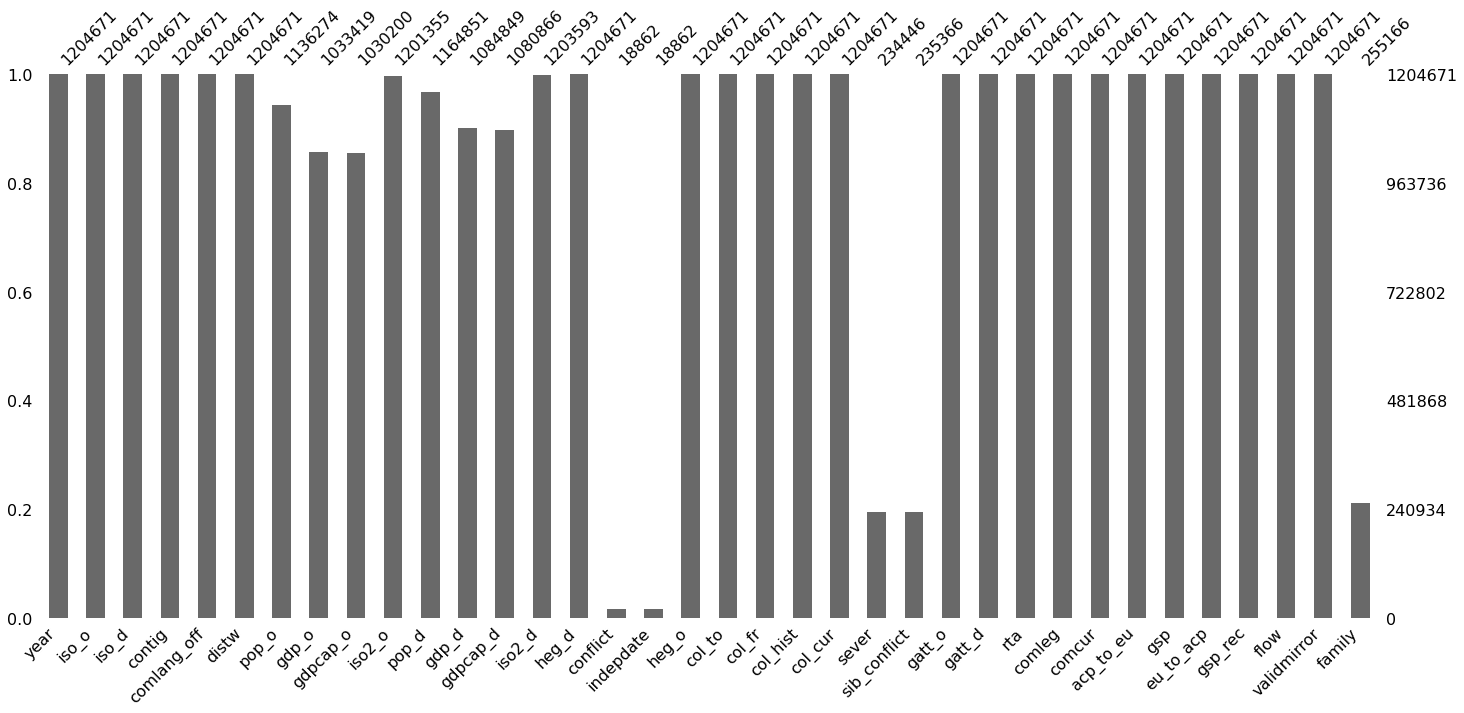

In [ ]:
msno.bar(df)

## Check to see how much data is missing in each column

In [ ]:
# Find how much data is missing in each column
# Function to look at missing rows per column
def missing(dataset):
    columns = dataset.columns
    print('MISSING ROWS per COLUMN')
    for column in columns:
        percentage = (dataset[column].isnull().sum() / len(df)) * 100
        print('{}: {}, {:0.2f}%'.format(column, dataset[column].isnull().sum(), percentage))
        
        
# Missing rows per column       
missing(df)

MISSING ROWS per COLUMN
year: 0, 0.00%
iso_o: 0, 0.00%
iso_d: 0, 0.00%
contig: 0, 0.00%
comlang_off: 0, 0.00%
distw: 0, 0.00%
pop_o: 68397, 5.68%
gdp_o: 171252, 14.22%
gdpcap_o: 174471, 14.48%
iso2_o: 3316, 0.28%
pop_d: 39820, 3.31%
gdp_d: 119822, 9.95%
gdpcap_d: 123805, 10.28%
iso2_d: 1078, 0.09%
heg_d: 0, 0.00%
conflict: 1185809, 98.43%
indepdate: 1185809, 98.43%
heg_o: 0, 0.00%
col_to: 0, 0.00%
col_fr: 0, 0.00%
col_hist: 0, 0.00%
col_cur: 0, 0.00%
sever: 970225, 80.54%
sib_conflict: 969305, 80.46%
gatt_o: 0, 0.00%
gatt_d: 0, 0.00%
rta: 0, 0.00%
comleg: 0, 0.00%
comcur: 0, 0.00%
acp_to_eu: 0, 0.00%
gsp: 0, 0.00%
eu_to_acp: 0, 0.00%
gsp_rec: 0, 0.00%
flow: 0, 0.00%
validmirror: 0, 0.00%
family: 949505, 78.82%


## Checking the correlation between variables 

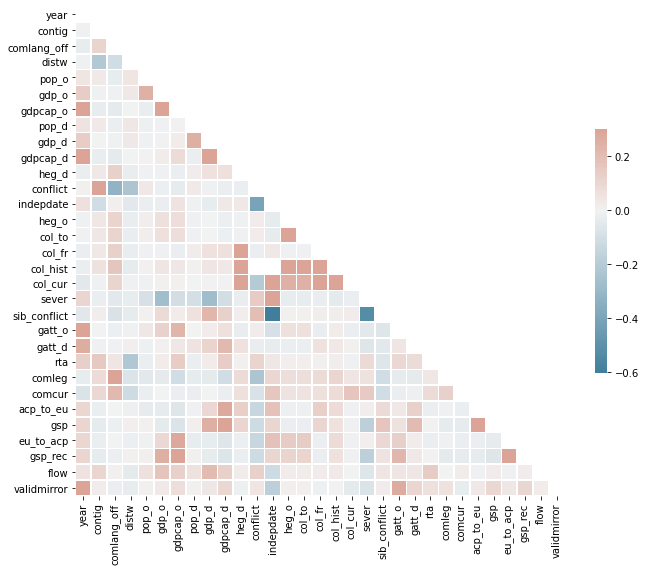

,year,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,pop_d,gdp_d,gdpcap_d,heg_d,conflict,indepdate,heg_o,col_to,col_fr,col_hist,col_cur,sever,sib_conflict,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
year,1.000000,-0.009449,-0.030092,-0.003792,0.048755,0.136330,0.346046,0.049674,0.139321,0.353173,-0.023809,0.003688,0.067084,-0.006635,-0.006635,-0.023809,-0.022000,-0.052248,0.111346,-0.054948,0.328403,0.261218,0.130428,-0.030711,-0.077449,0.101327,0.107530,0.099908,0.107434,0.051431,0.306198
contig,-0.009449,1.000000,0.115638,-0.212060,0.029344,-0.004461,-0.029762,0.030731,-0.003458,-0.027319,0.038325,0.309818,-0.108358,0.041796,0.041796,0.038325,0.056791,-0.008665,-0.018664,0.017185,-0.000637,-0.008846,0.155845,0.085775,0.092954,-0.021711,-0.034513,-0.021463,-0.034549,0.108885,0.018002
comlang_off,-0.030092,0.115638,1.000000,-0.108692,-0.028975,-0.008732,-0.041678,-0.019431,-0.007732,-0.041954,0.122839,-0.324287,0.013541,0.113066,0.113066,0.122839,0.167667,0.115010,-0.052995,-0.082534,-0.016829,-0.009079,0.045776,0.377573,0.216033,-0.002847,-0.016689,-0.002025,-0.016937,0.010302,-0.023496
distw,-0.003792,-0.212060,-0.108692,1.000000,0.047344,0.034243,-0.003117,0.040942,0.033115,-0.003294,-0.025001,-0.231854,-0.047890,-0.026765,-0.026765,-0.025001,-0.036704,-0.006079,-0.028883,-0.038285,-0.007822,0.011791,-0.219649,-0.071034,-0.118572,-0.012461,0.010542,-0.016123,0.010168,-0.041778,-0.031704
pop_o,0.048755,0.029344,-0.028975,0.047344,1.000000,0.248118,-0.026601,-0.012112,-0.003906,0.002044,-0.010409,0.033817,-0.023695,0.017276,0.017276,-0.010409,0.004880,-0.005315,-0.090507,0.003529,0.041602,-0.011994,-0.018792,-0.047338,-0.022185,-0.032220,0.008001,-0.005640,0.010869,0.063742,0.006922
gdp_o,0.136330,-0.004461,-0.008732,0.034243,0.248118,1.000000,0.430279,-0.003917,0.002912,0.027282,-0.004164,-0.015570,-0.020970,0.065298,0.065298,-0.004164,0.045164,0.005068,-0.271531,0.090831,0.118464,0.007556,0.026716,-0.041971,-0.002208,-0.032151,-0.040129,0.095036,0.256044,0.172907,0.028836
gdpcap_o,0.346046,-0.029762,-0.041678,-0.003117,-0.026601,0.430279,1.000000,0.002745,0.028018,0.086367,-0.018644,-0.037053,0.054390,0.071944,0.071944,-0.018644,0.040232,0.009169,-0.101274,0.025712,0.230409,0.041066,0.134475,-0.107125,-0.018788,-0.060625,-0.072977,0.279569,0.439713,0.122151,0.071175
pop_d,0.049674,0.030731,-0.019431,0.040942,-0.012112,-0.003917,0.002745,1.000000,0.254763,-0.022337,0.018400,0.028213,-0.007435,-0.008847,-0.008847,0.018400,0.007786,-0.000777,-0.097345,0.061289,-0.001714,0.050460,-0.018383,-0.037456,-0.019678,-0.005476,0.012044,-0.031830,0.008886,0.059848,0.006394
gdp_d,0.139321,-0.003458,-0.007732,0.033115,-0.003906,0.002912,0.028018,0.254763,1.000000,0.429529,0.060679,-0.007435,-0.029964,-0.003072,-0.003072,0.060679,0.044067,0.003035,-0.273496,0.221957,0.020195,0.115693,0.027827,-0.040241,-0.003146,0.095373,0.256513,-0.030600,-0.037963,0.209533,0.039229
gdpcap_d,0.353173,-0.027319,-0.041954,-0.003294,0.002044,0.027282,0.086367,-0.022337,0.429529,1.000000,0.063794,-0.023594,0.036371,-0.016159,-0.016159,0.063794,0.037906,0.002294,-0.101479,0.122476,0.068683,0.215958,0.135381,-0.106367,-0.020739,0.279809,0.437729,-0.057080,-0.068099,0.126830,0.099665


In [ ]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
s = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.show()
corr

## Droping the features with more than 50% missing values. 



In [ ]:
# Drop all columns with more than 50% of it's values missing
df_dc = df[df.columns[df.isnull().mean() < 0.5]]
df_dc.head()

,year,iso_o,iso_d,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,iso2_o,pop_d,gdp_d,gdpcap_d,iso2_d,heg_d,heg_o,col_to,col_fr,col_hist,col_cur,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
0,1999,ABW,AGO,0,0,9587.315563,NaN,1722.905029,NaN,AW,13.500820,6154.479980,455.859711,AO,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,0
1,2000,ABW,AGO,0,0,9587.315563,NaN,1858.659180,NaN,AW,13.840636,9129.179688,659.592468,AO,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,1
2,2001,ABW,AGO,0,0,9587.315563,NaN,1898.882690,NaN,AW,14.214834,8936.023438,628.640686,AO,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,1
3,2002,ABW,AGO,0,0,9587.315563,NaN,1911.173218,NaN,AW,14.618782,11431.738281,781.989807,AO,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,1
4,2003,ABW,AGO,0,0,9587.315563,0.099,NaN,NaN,AW,15.046907,13956.267578,927.517334,AO,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,1


## Dropping the categorical variables thas have less impact on the target variable GDP of the origin country. 

In [ ]:
df_num=df_dc.drop(['iso_o','iso_d','iso2_o','iso2_d'],axis=1)
df_num.head()

,year,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,pop_d,gdp_d,gdpcap_d,heg_d,heg_o,col_to,col_fr,col_hist,col_cur,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
0,1999,0,0,9587.315563,NaN,1722.905029,NaN,13.500820,6154.479980,455.859711,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,0
1,2000,0,0,9587.315563,NaN,1858.659180,NaN,13.840636,9129.179688,659.592468,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,1
2,2001,0,0,9587.315563,NaN,1898.882690,NaN,14.214834,8936.023438,628.640686,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,1
3,2002,0,0,9587.315563,NaN,1911.173218,NaN,14.618782,11431.738281,781.989807,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,1
4,2003,0,0,9587.315563,0.099,NaN,NaN,15.046907,13956.267578,927.517334,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,1


In [ ]:
for col in  df_num.columns:
    df_num[col] = pd.to_numeric(df_num[col], errors='coerce')


In [ ]:
df_num.dtypes

year             int64
contig           int64
comlang_off      int64
distw          float64
pop_o          float64
gdp_o          float64
gdpcap_o       float64
pop_d          float64
gdp_d          float64
gdpcap_d       float64
heg_d            int64
heg_o            int64
col_to           int64
col_fr           int64
col_hist         int64
col_cur          int64
gatt_o           int64
gatt_d           int64
rta              int64
comleg           int64
comcur           int64
acp_to_eu        int64
gsp              int64
eu_to_acp        int64
gsp_rec          int64
flow           float64
validmirror      int64
dtype: object

In [ ]:
df_num["gdp_o"] = pd.to_numeric(df_num["gdp_o"])


In [ ]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
df_num_missing= missing_values_table(df_num)
df_num_missing

Your selected dataframe has 27 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
gdpcap_o,174471,14.5
gdp_o,171252,14.2
gdpcap_d,123805,10.3
gdp_d,119822,9.9
pop_o,68397,5.7
pop_d,39820,3.3


## Detecting missing data visually using Missingno library

## Visualizing the locations of the missing data

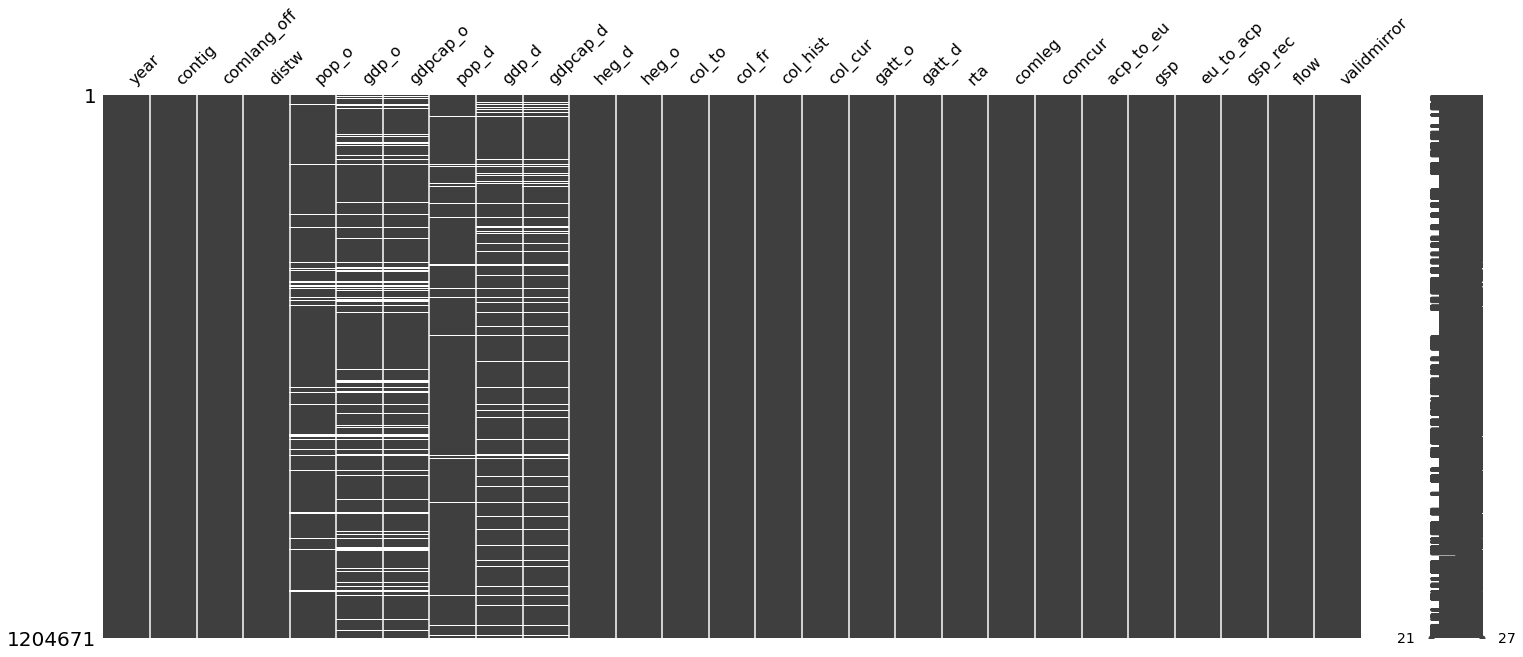

In [ ]:
msno.matrix(df_num)

In [ ]:
df_num.dtypes

year             int64
contig           int64
comlang_off      int64
distw          float64
pop_o          float64
gdp_o          float64
gdpcap_o       float64
pop_d          float64
gdp_d          float64
gdpcap_d       float64
heg_d            int64
heg_o            int64
col_to           int64
col_fr           int64
col_hist         int64
col_cur          int64
gatt_o           int64
gatt_d           int64
rta              int64
comleg           int64
comcur           int64
acp_to_eu        int64
gsp              int64
eu_to_acp        int64
gsp_rec          int64
flow           float64
validmirror      int64
dtype: object

In [ ]:
df_num

,year,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,pop_d,gdp_d,gdpcap_d,heg_d,heg_o,col_to,col_fr,col_hist,col_cur,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
0,1999,0,0,9587.315563,NaN,1722.905029,NaN,13.500820,6154.479980,455.859711,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0000,0
1,2000,0,0,9587.315563,NaN,1858.659180,NaN,13.840636,9129.179688,659.592468,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0000,1
2,2001,0,0,9587.315563,NaN,1898.882690,NaN,14.214834,8936.023438,628.640686,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0000,1
3,2002,0,0,9587.315563,NaN,1911.173218,NaN,14.618782,11431.738281,781.989807,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0000,1
4,2003,0,0,9587.315563,0.099000,NaN,NaN,15.046907,13956.267578,927.517334,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204666,2002,1,1,583.795373,12.785585,21897.027344,1712.633911,11.101816,3696.721680,332.983521,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,136.3582,1
1204667,2003,1,1,583.795373,12.863138,7397.224121,575.071472,11.291162,4326.579590,383.182861,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,198.3980,1
1204668,2004,1,1,583.795373,12.936295,4712.289062,364.268829,11.478886,5423.012207,472.433685,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,124.4060,1
1204669,2005,1,1,583.795373,13.009534,3418.093506,262.737579,11.668457,7270.074707,623.053650,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,110.4160,1


## SimpleImputer
[SimpleImputer](https://https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/)  is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder.
It is implemented by the use of the SimpleImputer() method which takes the following arguments :
missing_values : The missing_values placeholder which has to be imputed. By default is NaN
stategy : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.
fill_value : The constant value to be given to the NaN data using the constant strategy.

In [ ]:
## SimpleImputer
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(df_num)

In [ ]:
data_with_imputed_values

array([[1.99900e+03, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.00000e+03, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.00100e+03, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [2.00400e+03, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.24406e+02, 1.00000e+00],
       [2.00500e+03, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.10416e+02, 1.00000e+00],
       [2.00600e+03, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.75101e+02, 1.00000e+00]])

In [ ]:
new_data = pd.DataFrame(data_with_imputed_values,columns=df_num.columns)


In [ ]:
new_data.isnull().sum()

year           0
contig         0
comlang_off    0
distw          0
pop_o          0
gdp_o          0
gdpcap_o       0
pop_d          0
gdp_d          0
gdpcap_d       0
heg_d          0
heg_o          0
col_to         0
col_fr         0
col_hist       0
col_cur        0
gatt_o         0
gatt_d         0
rta            0
comleg         0
comcur         0
acp_to_eu      0
gsp            0
eu_to_acp      0
gsp_rec        0
flow           0
validmirror    0
dtype: int64

In [ ]:
new_data.head()

,year,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,pop_d,gdp_d,gdpcap_d,heg_d,heg_o,col_to,col_fr,col_hist,col_cur,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
0,1999.0,0.0,0.0,9587.315563,32.596779,1722.905029,4553.223075,13.500820,6154.479980,455.859711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000.0,0.0,0.0,9587.315563,32.596779,1858.659180,4553.223075,13.840636,9129.179688,659.592468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2001.0,0.0,0.0,9587.315563,32.596779,1898.882690,4553.223075,14.214834,8936.023438,628.640686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2002.0,0.0,0.0,9587.315563,32.596779,1911.173218,4553.223075,14.618782,11431.738281,781.989807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2003.0,0.0,0.0,9587.315563,0.099000,134662.119236,4553.223075,15.046907,13956.267578,927.517334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Find how much data is missing in each column
# Function to look at missing rows per column
def missing(dataset):
    columns = dataset.columns
    print('MISSING ROWS per COLUMN')
    for column in columns:
        percentage = (dataset[column].isnull().sum() / len(new_data)) * 100
        print('{}: {}, {:0.2f}%'.format(column, dataset[column].isnull().sum(), percentage))
        
        
# Missing rows per column       
missing(new_data)

MISSING ROWS per COLUMN
year: 0, 0.00%
contig: 0, 0.00%
comlang_off: 0, 0.00%
distw: 0, 0.00%
pop_o: 0, 0.00%
gdp_o: 0, 0.00%
gdpcap_o: 0, 0.00%
pop_d: 0, 0.00%
gdp_d: 0, 0.00%
gdpcap_d: 0, 0.00%
heg_d: 0, 0.00%
heg_o: 0, 0.00%
col_to: 0, 0.00%
col_fr: 0, 0.00%
col_hist: 0, 0.00%
col_cur: 0, 0.00%
gatt_o: 0, 0.00%
gatt_d: 0, 0.00%
rta: 0, 0.00%
comleg: 0, 0.00%
comcur: 0, 0.00%
acp_to_eu: 0, 0.00%
gsp: 0, 0.00%
eu_to_acp: 0, 0.00%
gsp_rec: 0, 0.00%
flow: 0, 0.00%
validmirror: 0, 0.00%


In [ ]:
new_data.dtypes

year           float64
contig         float64
comlang_off    float64
distw          float64
pop_o          float64
gdp_o          float64
gdpcap_o       float64
pop_d          float64
gdp_d          float64
gdpcap_d       float64
heg_d          float64
heg_o          float64
col_to         float64
col_fr         float64
col_hist       float64
col_cur        float64
gatt_o         float64
gatt_d         float64
rta            float64
comleg         float64
comcur         float64
acp_to_eu      float64
gsp            float64
eu_to_acp      float64
gsp_rec        float64
flow           float64
validmirror    float64
dtype: object

## After imputing the data and checking for any missing values the new data set is ready to analyze. 